In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


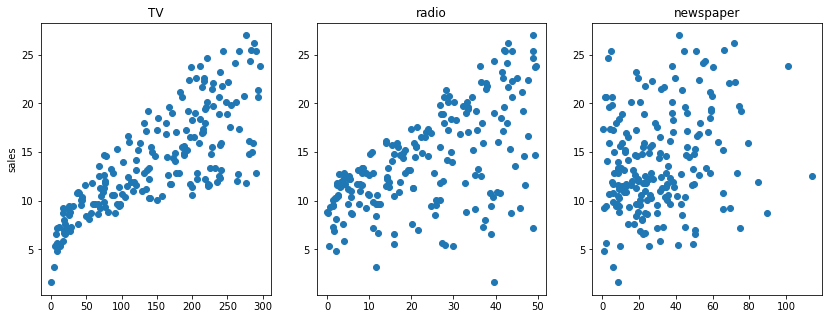

In [4]:
plt.figure(figsize=(14, 5))
plt.subplot(131)
plt.scatter(df.TV,df.sales)
plt.title('TV')
plt.ylabel('sales')
plt.subplot(132)
plt.scatter(df.radio,df.sales)
plt.title('radio')
plt.subplot(133)
plt.scatter(df.newspaper,df.sales)
plt.title('newspaper')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:3],df.sales, random_state=0)

In [58]:
lr = linear_model.LinearRegression()
lr.fit(X_train[['TV']], y_train)

LinearRegression()

In [66]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.04614341]
lr.intercept_: 7.248909283005855


In [68]:
print("Training set score: {:.2f}".format(lr.score(X_train[['TV']], y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test[['TV']], y_test)))

Training set score: 0.58
Test set score: 0.69


# Are the estimates sensitive to the number of observations

In [11]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
lr = linear_model.LinearRegression()
lr.fit(df[['TV']], df.sales)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("Training set score: {:.2f}".format(lr.score(df[['TV']], df.sales)))

lr.coef_: [0.04753664]
lr.intercept_: 7.032593549127694
Training set score: 0.61


In [14]:
import statsmodels.api as sm

In [15]:
X = df['TV'].to_numpy()
y = df.sales.to_numpy()
X.shape = (len(X),1)
x = sm.add_constant(X)
y.shape = (len(y),1)

In [16]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        16:23:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0